<span style="font-size:13px"><strong>A. The Cyclistic</strong></span><br>
<span style="font-size:12px">
In 2016, Cyclistic launched a successful bike-sharing program. Since then, it has expanded into a fleet of 5,824 geo-tracked bicycles docked at 692 stations across Chicago. Bikes can be unlocked from one station and returned to another at any time. To date, Cyclistic’s marketing strategy has focused on general public awareness and reaching a broad consumer base. This is supported by flexible pricing plans: single-ride passes, full-day passes, and annual memberships. Customers using single-ride or full-day passes are <strong>casual users</strong>, while annual subscribers are <strong>Cyclistic members</strong>.
</span>
<br>

<span style="font-size:13px"><strong>B. Purpose of the Case Study</strong></span><br>
<span style="font-size:12px">
To analyze behavioral differences between casual users and annual members of Cyclistic's bike-sharing service. Insights from this analysis will help design marketing strategies to convert casual users into annual members.
</span>

---

<span style="font-size:13px"><strong>1. Ask</strong></span><br>
<span style="font-size:12px"><u>1.1 Business Task</u></span><br>
<span style="font-size:12px">
• How do annual members and casual users use Cyclistic bikes differently?<br>
• Why would casual users purchase an annual membership?<br>
• How can Cyclistic use digital media to convert casual users into members?
</span>

<span style="font-size:12px"><u>1.2 Stakeholders</u></span><br>
<span style="font-size:12px">
• Lily Moreno (Marketing Director)<br>
• Data Analyst Team<br>
• Cyclistic Executive Team
</span>

---

<span style="font-size:13px"><strong>2. Prepare</strong></span><br>
<span style="font-size:12px"><u>2.1 Data Used</u></span><br>
<span style="font-size:12px">
The dataset comes from historical Cyclistic trip data available via RStudio or directly downloadable from:  
<a href="https://divvy-tripdata.s3.amazonaws.com/index.html">divvy-tripdata.s3.amazonaws.com</a><br>
Used datasets: Divvy 2019 Q1 and Divvy 2020 Q1.
</span>

<span style="font-size:12px"><u>2.2 Data Saved As</u></span><br>
<span style="font-size:12px">File name: <code>Cyclistic_TripData_2019Q1_2020Q1_Analysis.xlsx</code></span>

<span style="font-size:12px"><u>2.3 Dataset Description</u></span><br>
<span style="font-size:12px">
This dataset combines trip records from Q1 2019 and Q1 2020. It includes timestamps, station data, bike types, and user types. 2019 data was standardized and merged for consistency with 2020 format. The full dataset contains approx. 791,956 trips.
</span>

<span style="font-size:12px"><u>2.4 Data Structure</u></span><br>
<table style="font-size:12px">
<thead>
<tr><th>Column</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td>ride_id</td><td>Unique trip ID (numeric in 2019, string in 2020; standardized with "2019_" prefix)</td></tr>
<tr><td>rideable_type</td><td>Type of bike used (only <code>docked_bike</code>)</td></tr>
<tr><td>started_at</td><td>Trip start time</td></tr>
<tr><td>ended_at</td><td>Trip end time</td></tr>
<tr><td>start_station_name</td><td>Start station name</td></tr>
<tr><td>start_station_id</td><td>Start station ID</td></tr>
<tr><td>end_station_name</td><td>End station name</td></tr>
<tr><td>end_station_id</td><td>End station ID</td></tr>
<tr><td>start_lat / start_lng</td><td>Start station lat/lng (not available in 2019)</td></tr>
<tr><td>end_lat / end_lng</td><td>End station lat/lng (not available in 2019)</td></tr>
<tr><td>member_casual</td><td>User type: <code>member</code> or <code>casual</code></td></tr>
</tbody>
</table>

<span style="font-size:12px"><u>2.5 Accessibility and Privacy</u></span><br>
<span style="font-size:12px">
This is a public dataset provided by Motivate International Inc. All labels are anonymized and adapted for Cyclistic. No personal data is included. The dataset is free for non-commercial use.
</span>

<span style="font-size:12px"><u>2.6 ROCCC Criteria</u></span><br>
<span style="font-size:12px">
• <strong>Reliable</strong>: From a real-world bike-sharing system<br>
• <strong>Original</strong>: Raw data from bike-tracking<br>
• <strong>Comprehensive</strong>: Covers full trip details across two quarters<br>
• <strong>Current</strong>: Represents latest data available at time<br>
• <strong>Cited</strong>: Used under proper context from official source
</span>

---

<span style="font-size:13px"><strong>3. Process</strong></span><br>
<span style="font-size:12px">
The analysis will use Python due to the large dataset size (791,956 rows). Python provides powerful tools for data cleaning, analysis, and visualization, making it ideal for supporting insights and decision-making.
</span>

In [1]:
# 22 Juni 2025
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading The Dataset
df_all_trip = pd.read_csv(
    r'C:\Users\HP\Documents\Cyclistic_TripData_2019Q1_2020Q1_Analyze.csv',
    delimiter=';',  
    encoding='utf-8',
    on_bad_lines='skip')

# Cheking The Dataset
df_all_trip.head()

,ride_id,rideable_type,Started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,2019_21742443,docked_bike,2019-01-01 00:04:37,2019-01-01 00:11:07,Wabash Ave & Grand Ave,199,Milwaukee Ave & Grand Ave,84.0,NaN,NaN,NaN,NaN,member
1,2019_21742444,docked_bike,2019-01-01 00:08:13,2019-01-01 00:15:34,State St & Randolph St,44,Dearborn St & Van Buren St (*),624.0,NaN,NaN,NaN,NaN,member
2,2019_21742445,docked_bike,2019-01-01 00:13:23,2019-01-01 00:27:12,Racine Ave & 18th St,15,Western Ave & Fillmore St (*),644.0,NaN,NaN,NaN,NaN,member
3,2019_21742446,docked_bike,2019-01-01 00:13:45,2019-01-01 00:43:28,California Ave & Milwaukee Ave,123,Clark St & Elm St,176.0,NaN,NaN,NaN,NaN,member
4,2019_21742447,docked_bike,2019-01-01 00:14:52,2019-01-01 00:20:56,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35.0,NaN,NaN,NaN,NaN,member


In [2]:
# Cheking Count Columns & Rows The Dataset
df_all_trip.shape

(791956, 13)

In [3]:
# Information Of The Dataset
df_all_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791956 entries, 0 to 791955
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             791956 non-null  object 
 1   rideable_type       791956 non-null  object 
 2   Started_at          791956 non-null  object 
 3   ended_at            791956 non-null  object 
 4   start_station_name  791956 non-null  object 
 5   start_station_id    791956 non-null  int64  
 6   end_station_name    791955 non-null  object 
 7   end_station_id      791955 non-null  float64
 8   start_lat           426887 non-null  float64
 9   start_lng           426887 non-null  float64
 10  end_lat             426886 non-null  float64
 11  end_lng             426886 non-null  float64
 12  member_casual       791956 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 78.5+ MB


In [4]:
# Converting started_at & ended_at From String To Datetime
df_all_trip['Started_at'] = pd.to_datetime(df_all_trip['Started_at'])
df_all_trip['ended_at'] = pd.to_datetime(df_all_trip['ended_at'])

In [5]:
# Converting end_station_id Float To Integer
df_all_trip['end_station_id'] = df_all_trip['end_station_id'].fillna(-1).astype(int)

In [6]:
# Cheking Types The Dataset
df_all_trip.dtypes

ride_id                       object
rideable_type                 object
Started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id               int64
end_station_name              object
end_station_id                 int64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [7]:
# Rename Columns The Dataset
df_all_trip.rename(columns={'Started_at': 'started_at',
                            'start_lng' : 'start_long',
                            'end_lng' : 'end_long'}, 
                            inplace=True)

In [8]:
# Add New Column About ride_length
df_all_trip['ride_length'] = df_all_trip['ended_at'] - df_all_trip['started_at']

In [9]:
# Add New Column About day_of_week
df_all_trip['day_of_week'] = df_all_trip['started_at'].dt.weekday.apply(lambda x: ((x + 1) % 7) + 1)

In [10]:
# Change posisition the columns
columns = ['ride_id', 'rideable_type','started_at', 'ended_at','ride_length', 'day_of_week', 
           'start_station_name', 'start_station_id', 'end_station_name','end_station_id', 
           'start_lat', 'start_long', 'end_lat', 'end_long', 'member_casual']
df_all_trip = df_all_trip[columns]

In [11]:
# Backup The Dataset Before Cleaning Data
df_all_trip_back_up = df_all_trip.copy(deep=True)

In [12]:
# Cheking missing values
df_all_trip.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
ride_length                0
day_of_week                0
start_station_name         0
start_station_id           0
end_station_name           1
end_station_id             0
start_lat             365069
start_long            365069
end_lat               365070
end_long              365070
member_casual              0
dtype: int64

In [13]:
# Cheking end_station_name' is Null
missing_end_station = df_all_trip[df_all_trip['end_station_name'].isna()]
missing_end_station

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_long,end_lat,end_long,member_casual
779495,157EAA4C4A3C8D36,docked_bike,2020-03-16 11:23:36,2020-03-16 11:23:24,-1 days +23:59:48,2,HQ QR,675,NaN,-1,418.899,-876.803,NaN,NaN,casual


In [14]:
# Add value is null in end_station_name with 'HQ QR'
df_all_trip['end_station_name'] = df_all_trip['end_station_name'].fillna('HQ RQ')

In [15]:
# Chenking 'end_station_id' is -1
end_station_id_minus_one = df_all_trip[df_all_trip['end_station_id'] == -1]
end_station_id_minus_one

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_long,end_lat,end_long,member_casual
779495,157EAA4C4A3C8D36,docked_bike,2020-03-16 11:23:36,2020-03-16 11:23:24,-1 days +23:59:48,2,HQ QR,675,HQ RQ,-1,418.899,-876.803,NaN,NaN,casual


In [16]:
# Change end_station_id is -1 with 675
df_all_trip['end_station_id'].replace(-1, 675)

0          84
1         624
2         644
3         176
4          35
         ... 
791951    675
791952    240
791953    210
791954    264
791955     85
Name: end_station_id, Length: 791956, dtype: int64

In [17]:
# Cheking duplicate value
df_all_trip.duplicated().sum()

np.int64(0)

In [18]:
# 24 Juni 2025
# Checking for Unique Values
cat_cols = ['ride_id', 'rideable_type', 'day_of_week', 'member_casual']

for col in cat_cols:
    unique_values = df_all_trip[col].unique()  
    print(f'{col}: {len(unique_values)} unique values')
    print(f'Unique values for {col}: {unique_values}\n')

ride_id: 791956 unique values
Unique values for ride_id: ['2019_21742443' '2019_21742444' '2019_21742445' ... 'AA0D5AAA0B59C8AA'
 '3296360A7BC20FB8' '064EC7698E4FF9B3']

rideable_type: 1 unique values
Unique values for rideable_type: ['docked_bike']

day_of_week: 7 unique values
Unique values for day_of_week: [3 4 5 6 7 1 2]

member_casual: 2 unique values
Unique values for member_casual: ['member' 'casual']



In [19]:
# Checking Consistency Between start_station_names and start_station_id
start_station_check = df_all_trip.groupby('start_station_name')['start_station_id'].nunique()
start_station_duplicates = start_station_check[start_station_check > 1]

print('Start stations with multiple different id:')
start_station_duplicates

Start stations with multiple different id:


Series([], Name: start_station_id, dtype: int64)

In [20]:
# Checking Consistency Between end_station_names and end_station_id
end_station_check = df_all_trip.groupby('end_station_name')['end_station_id'].nunique()
end_station_duplicates = end_station_check[end_station_check > 1]

print('End stations with multiple different id:')
end_station_duplicates

End stations with multiple different id:


Series([], Name: end_station_id, dtype: int64)

In [21]:
# Cheking Anomali ended_at < started_at
anomaly_datetime = df_all_trip[df_all_trip['ended_at'] < df_all_trip['started_at']]

print(f'Count Of ended_at < started_at : {len(anomaly_datetime)}')
anomaly_datetime [['ride_id', 'started_at', 'ended_at']]

Count Of ended_at < started_at : 117


,ride_id,started_at,ended_at
520401,9461DFF13D8BA8AD,2020-02-28 10:09:43,2020-02-28 10:09:42
648666,794264334D168D05,2020-03-18 11:43:09,2020-03-18 11:42:58
651962,3CC0D87545CE223B,2020-03-19 09:43:05,2020-03-19 09:42:51
652289,32CAF6E2E7AB67CE,2020-03-12 10:00:46,2020-03-12 10:00:36
653844,13BCB74BAFDADB21,2020-03-27 14:59:51,2020-03-27 14:58:18
...,...,...,...
786502,C2F71E40D52A0660,2020-03-18 15:12:18,2020-03-18 15:12:04
786686,14AF5815838B9F2C,2020-03-13 08:38:14,2020-03-13 08:38:03
788670,D94EF149247F3880,2020-03-19 10:24:16,2020-03-19 10:24:05
788945,323CAC41316F59B2,2020-03-13 08:51:45,2020-03-13 08:51:34


In [22]:
# Checking anomaly: trips where started_at equals ended_at
anomaly_datetime_same = df_all_trip[df_all_trip['started_at'] == df_all_trip['ended_at']]

print(f'Count Of started_at = ended_at : {len(anomaly_datetime_same)}')
anomaly_datetime [['ride_id', 'started_at', 'ended_at']]

Count Of started_at = ended_at : 93


,ride_id,started_at,ended_at
520401,9461DFF13D8BA8AD,2020-02-28 10:09:43,2020-02-28 10:09:42
648666,794264334D168D05,2020-03-18 11:43:09,2020-03-18 11:42:58
651962,3CC0D87545CE223B,2020-03-19 09:43:05,2020-03-19 09:42:51
652289,32CAF6E2E7AB67CE,2020-03-12 10:00:46,2020-03-12 10:00:36
653844,13BCB74BAFDADB21,2020-03-27 14:59:51,2020-03-27 14:58:18
...,...,...,...
786502,C2F71E40D52A0660,2020-03-18 15:12:18,2020-03-18 15:12:04
786686,14AF5815838B9F2C,2020-03-13 08:38:14,2020-03-13 08:38:03
788670,D94EF149247F3880,2020-03-19 10:24:16,2020-03-19 10:24:05
788945,323CAC41316F59B2,2020-03-13 08:51:45,2020-03-13 08:51:34


In [23]:
# Valid Trip Duration Filter
df_all_trip= df_all_trip[df_all_trip['ended_at'] > df_all_trip['started_at']]

In [24]:
# Preprocessing String Columns: Convert to String and Remove Whitespaces
string_columns = ['ride_id', 'rideable_type', 'start_station_name', 'end_station_name', 'member_casual']

for col in string_columns:
    df_all_trip[col] = df_all_trip[col].astype(str).str.strip()

In [25]:
# Feature Extraction: Length of ride_id Strings
df_all_trip['ride_id_length'] = df_all_trip['ride_id'].str.len()

df_all_trip.head()

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_long,end_lat,end_long,member_casual,ride_id_length
0,2019_21742443,docked_bike,2019-01-01 00:04:37,2019-01-01 00:11:07,0 days 00:06:30,3,Wabash Ave & Grand Ave,199,Milwaukee Ave & Grand Ave,84,NaN,NaN,NaN,NaN,member,13
1,2019_21742444,docked_bike,2019-01-01 00:08:13,2019-01-01 00:15:34,0 days 00:07:21,3,State St & Randolph St,44,Dearborn St & Van Buren St (*),624,NaN,NaN,NaN,NaN,member,13
2,2019_21742445,docked_bike,2019-01-01 00:13:23,2019-01-01 00:27:12,0 days 00:13:49,3,Racine Ave & 18th St,15,Western Ave & Fillmore St (*),644,NaN,NaN,NaN,NaN,member,13
3,2019_21742446,docked_bike,2019-01-01 00:13:45,2019-01-01 00:43:28,0 days 00:29:43,3,California Ave & Milwaukee Ave,123,Clark St & Elm St,176,NaN,NaN,NaN,NaN,member,13
4,2019_21742447,docked_bike,2019-01-01 00:14:52,2019-01-01 00:20:56,0 days 00:06:04,3,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,NaN,NaN,NaN,NaN,member,13


In [26]:
# Standardizing Text: Capitalize member_casual Values
df_all_trip['member_casual'] = df_all_trip['member_casual'].str.capitalize()

In [27]:
# Standardizing rideable_type: Rename 'docked_bike' to 'Docked Bike'
df_all_trip['rideable_type'] = df_all_trip['rideable_type'].replace({'docked_bike': 'Docked Bike'})

In [28]:
# Transforming Ride Duration to Minutes
df_all_trip['ride_length'] = df_all_trip['ride_length'].dt.total_seconds() / 60

In [29]:
# Filtering ride_leghth Less Than 1 Minute
short_rides = df_all_trip[df_all_trip['ride_length'] < 1]
short_rides

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_long,end_lat,end_long,member_casual,ride_id_length
365356,CEB3A25A22460197,Docked Bike,2020-01-27 09:47:24,2020-01-27 09:47:31,0.116667,2,LaSalle St & Jackson Blvd,283,LaSalle St & Jackson Blvd,283,418.782,-876.319,418.782,-876.319,Member,16
365604,950D58DAF72AF908,Docked Bike,2020-01-30 06:56:26,2020-01-30 06:57:07,0.683333,5,Leavitt St & Armitage Ave,309,Leavitt St & Armitage Ave,309,419.178,-876.824,419.178,-876.824,Member,16
365639,89D3D51310A2D7ED,Docked Bike,2020-01-08 08:29:53,2020-01-08 08:30:05,0.200000,4,Broadway & Wilson Ave,293,Broadway & Wilson Ave,293,419.652,-876.581,419.652,-876.581,Member,16
366228,8681DB6781B16DCD,Docked Bike,2020-01-09 18:36:53,2020-01-09 18:37:11,0.300000,5,Clarendon Ave & Leland Ave,251,Clarendon Ave & Leland Ave,251,41.968,-87.650,41.968,-87.650,Member,16
366327,CBEFEF554E477BDC,Docked Bike,2020-01-28 18:58:40,2020-01-28 18:58:42,0.033333,3,Dearborn St & Erie St,110,Dearborn St & Erie St,110,41.894,-876.293,41.894,-876.293,Member,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791902,1F760629999E6E2C,Docked Bike,2020-03-06 08:58:20,2020-03-06 08:58:23,0.050000,6,HQ QR,675,HQ QR,675,418.899,-876.803,418.899,-876.803,Casual,16
791903,8F274E931C90228F,Docked Bike,2020-03-06 08:58:44,2020-03-06 08:58:47,0.050000,6,HQ QR,675,HQ QR,675,418.899,-876.803,418.899,-876.803,Casual,16
791904,225698302AEDAD18,Docked Bike,2020-03-06 08:57:58,2020-03-06 08:58:00,0.033333,6,HQ QR,675,HQ QR,675,418.899,-876.803,418.899,-876.803,Casual,16
791950,6F4D221BDDFD943F,Docked Bike,2020-03-10 10:40:27,2020-03-10 10:40:29,0.033333,3,HQ QR,675,HQ QR,675,418.899,-876.803,418.899,-876.803,Casual,16


In [30]:
# Data Cleaning: Exclude Rides Under 1 Minute
df_all_trip = df_all_trip[df_all_trip['ride_length'] >= 1] 

In [31]:
# Standardizing ride_length
df_all_trip['ride_length'] = df_all_trip['ride_length'].round(2)

In [32]:
# Drop column ride_id_length Because Not Use
df_all_trip = df_all_trip.drop(columns=['ride_id_length'])

In [33]:
# Identifying start_station_name and end_station_name with Asterisk (*)
start_stations_asterisk = df_all_trip.loc[
    df_all_trip['start_station_name'].str.contains(r'\(\*\)', na=False), 
    'start_station_name'].unique()

end_stations_asterisk = df_all_trip.loc[
    df_all_trip['end_station_name'].str.contains(r'\(\*\)', na=False), 
    'end_station_name'].unique()

stations_with_asterisk = set(start_stations_asterisk) | set(end_stations_asterisk)
stations_with_asterisk

{'Archer (Damen) Ave & 37th St (*)',
 'Canal St & Monroe St (*)',
 'Clinton St & Jackson Blvd (*)',
 'Clinton St & Polk St (*)',
 'Damen Ave & Walnut (Lake) St (*)',
 'Dearborn St & Van Buren St (*)',
 'Eggleston Ave & 69th St (*)',
 'Fairbanks St & Superior St (*)',
 'Halsted St & 35th St (*)',
 'Halsted St & Clybourn Ave (*)',
 'LaSalle Dr & Huron St (*)',
 'Leavitt St & Belmont Ave (*)',
 'Leavitt St & Division St (*)',
 'Loomis St & Taylor St (*)',
 'MLK Jr Dr & 56th St (*)',
 'Orleans St & Elm St (*)',
 'Orleans St & Hubbard St (*)',
 'Racine Ave & Washington Blvd (*)',
 'Sangamon St & Washington Blvd (*)',
 'Smith Park (*)',
 'Stewart Ave & 63rd St (*)',
 'Washtenaw Ave & Ogden Ave (*)',
 'Western Ave & Fillmore St (*)',
 'Wolcott (Ravenswood) Ave & Montrose Ave (*)',
 'Wood St & Chicago Ave (*)'}

In [34]:
# Standardizing start_station_name and end_station_name
df_all_trip['start_station_name'] = df_all_trip['start_station_name'].str.replace(r'\(\*\)', '', regex=True).str.strip()

df_all_trip['end_station_name'] = df_all_trip['end_station_name'].str.replace(r'\(\*\)', '', regex=True).str.strip()

In [35]:
# 25 Juni 2025
# Imputing Missing 2019 Coordinates Using 2020 Station Data Based on Station IDs

# Take All Coordinates From Start Station
start_coords = df_all_trip[~df_all_trip['start_lat'].isna()][
    ['start_station_id', 
     'start_station_name', 
     'start_lat', 
     'start_long']
].drop_duplicates()

# Take All Coordinates From End Station
end_coords = df_all_trip[~df_all_trip['end_lat'].isna()][
    ['end_station_id', 
     'end_station_name', 
     'end_lat', 
     'end_long']
].drop_duplicates()

# Change The Name Columns to be Mergeable
end_coords = end_coords.rename(columns={
    'end_station_id': 'station_id',
    'end_station_name': 'station_name',
    'end_lat': 'lat',
    'end_long': 'long'})

start_coords = start_coords.rename(columns={
    'start_station_id': 'station_id',
    'start_station_name': 'station_name',
    'start_lat': 'lat',
    'start_long': 'long'})

# Combining and Cleaning Station Coordinates Data
station_coords = pd.concat([start_coords, end_coords], ignore_index=True)
station_coords = station_coords.drop_duplicates(subset=['station_id']).dropna()

# Filling NaN Values in Start Coordinates via Station ID Mapping
df_all_trip = df_all_trip.merge(
    station_coords.rename(columns={'station_id': 'start_station_id', 
                                   'lat': 'start_lat_filled', 
                                   'long': 'start_long_filled'}),
    on='start_station_id',
    how='left')

df_all_trip['start_lat'] = df_all_trip['start_lat'].fillna(df_all_trip['start_lat_filled'])
df_all_trip['start_long'] = df_all_trip['start_long'].fillna(df_all_trip['start_long_filled'])

# Filling NaN Values in End Coordinates via Station ID Mapping
df_all_trip = df_all_trip.merge(
    station_coords.rename(columns={'station_id': 'end_station_id', 'lat': 'end_lat_filled', 'long': 'end_long_filled'}),
    on='end_station_id',
    how='left')

df_all_trip['end_lat'] = df_all_trip['end_lat'].fillna(df_all_trip['end_lat_filled'])
df_all_trip['end_long'] = df_all_trip['end_long'].fillna(df_all_trip['end_long_filled'])

# Delete Temporary Columns
df_all_trip.drop(columns=[
    'start_lat_filled', 
    'start_long_filled', 
    'end_lat_filled', 
    'end_long_filled'
], inplace=True)

In [36]:
# Identifying Rows with Missing Start or End Coordinates
missing_coords_df = df_all_trip[
    df_all_trip[['start_lat', 
                 'start_long',
                 'end_lat', 
                 'end_long']].isna().any(axis=1)]

print(f'Number of rows with missing coordinates: {len(missing_coords_df)}')

missing_coords_df.head()

Number of rows with missing coordinates: 57


,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_long,end_lat,end_long,member_casual,station_name_x,station_name_y
13246,2019_21758019,Docked Bike,2019-01-04 11:15:31,2019-01-04 11:26:25,10.90,6,Ashland Ave & Lake St (Temp),119,DIVVY Map Frame B/C Station,360,418.859,-876.672,NaN,NaN,Member,Ashland Ave & Lake St,NaN
19458,2019_21764967,Docked Bike,2019-01-05 12:11:02,2019-01-10 11:25:25,7154.38,7,Dearborn Pkwy & Delaware Pl,140,DIVVY Map Frame B/C Station,360,41.899,-876.299,NaN,NaN,Member,Dearborn Pkwy & Delaware Pl,NaN
67703,2019_21820582,Docked Bike,2019-01-15 17:34:39,2019-01-15 20:53:40,199.02,3,Ashland Ave & 66th St,565,Damen Ave & 59th St,561,NaN,NaN,NaN,NaN,Casual,NaN,NaN
68830,2019_21821861,Docked Bike,2019-01-15 20:57:33,2019-01-15 22:08:13,70.67,3,Damen Ave & 59th St,561,Damen Ave & 59th St,561,NaN,NaN,NaN,NaN,Casual,NaN,NaN
86090,2019_21842257,Docked Bike,2019-01-20 10:47:56,2019-02-19 11:02:35,43214.65,1,LaSalle Dr & Huron St,627,DIVVY Map Frame B/C Station,360,418.949,-876.323,NaN,NaN,Member,LaSalle Dr & Huron St,NaN


In [37]:
# Identifying 2019 Station IDs Not Present in 2020 

# Extract Unique Station IDs from 2020 Trips (Both Start and End)
station_2020_ids = set(df_all_trip[df_all_trip['started_at'].dt.year == 2020][['start_station_id', 
                                                                               'end_station_id']].stack().dropna())

# Select 2019 Trips with Missing Coordinates
missing_2019 = df_all_trip[
    (df_all_trip['started_at'].dt.year == 2019) &
    (df_all_trip[['start_lat', 
                  'start_long', 
                  'end_lat', 
                  'end_long']].isna().any(axis=1))]

# Find Start Stations in 2019 Missing in 2020 Data
start_missing = missing_2019[
    ~missing_2019['start_station_id'].isin(station_2020_ids)
][['start_station_id', 'start_station_name']].drop_duplicates()

# Find End Stations in 2019 Missing in 2020 Data
end_missing = missing_2019[
    ~missing_2019['end_station_id'].isin(station_2020_ids)
][['end_station_id', 'end_station_name']].drop_duplicates()

# Combine Missing Stations from Start and End, Rename Columns for Consistency
missing_stations = pd.concat([
    start_missing.rename(columns={'start_station_id': 'station_id', 
                                  'start_station_name': 'station_name'}),
    end_missing.rename(columns={'end_station_id': 'station_id', 
                                'end_station_name': 'station_name'})
]).drop_duplicates().sort_values('station_name')

print('Stations in 2019 with missing coordinates and not found in 2020:')
missing_stations

Stations in 2019 with missing coordinates and not found in 2020:


,station_id,station_name
67703,565,Ashland Ave & 66th St
198840,361,DIVVY CASSETTE REPAIR MOBILE STATION
144814,360,DIVVY Map Frame B/C Station
68830,561,Damen Ave & 59th St
204987,564,Racine Ave & 65th St
304550,665,South Chicago Ave & Elliot Ave


In [38]:
# Filling Missing Coordinates with Manually Collected Data 
station_coords_lat = {
    565: 41.7783,
    561: 41.7808,
    564: 41.7802,
    665: 41.7400,
    361: 41.8781, 
    360: 41.8850 
}

station_coords_long = {
    565: -87.6696,
    561: -87.6776,
    564: -87.6545,
    665: -87.5576,
    361: -87.6298,
    360: -87.6270
}

df_all_trip['start_lat'] = df_all_trip['start_lat'].fillna(df_all_trip['start_station_id'].map(station_coords_lat))
df_all_trip['start_long'] = df_all_trip['start_long'].fillna(df_all_trip['start_station_id'].map(station_coords_long))

df_all_trip['end_lat'] = df_all_trip['end_lat'].fillna(df_all_trip['end_station_id'].map(station_coords_lat))
df_all_trip['end_long'] = df_all_trip['end_long'].fillna(df_all_trip['end_station_id'].map(station_coords_long))

In [39]:
# Descriptive Statistics to Validate Geographic Coordinates
df_all_trip[['start_lat', 'start_long', 'end_lat', 'end_long']].describe().round(2)

,start_lat,start_long,end_lat,end_long
count,784285.00,784285.00,784285.00,784285.00
mean,381.59,-810.68,380.29,-809.88
std,112.69,218.03,114.41,219.25
min,41.74,-877.75,41.74,-877.75
25%,418.76,-876.53,418.76,-876.53
50%,418.86,-876.38,418.86,-876.39
75%,419.11,-876.26,419.11,-876.26
max,420.65,-87.56,420.65,-87.56


In [40]:
# Correcting Coordinate Scale Errors in Latitude and Longitude Values
def correct_coord(x):
    if abs(x) > 100:
        return x / 10
    return x

for col in ['start_lat', 'start_long', 'end_lat', 'end_long']:
    df_all_trip[col] = df_all_trip[col].apply(correct_coord)

In [41]:
# Exploratory Summary Statistics to Detect Anomalous or Unusual Data Values
df_all_trip.describe().round(2)

,started_at,ended_at,ride_length,day_of_week,start_station_id,end_station_id,start_lat,start_long,end_lat,end_long
count,784285,784285,784285.00,784285.00,784285.00,784285.00,784285.00,784285.00,784285.00,784285.00
mean,2019-08-30 18:13:09.471620608,2019-08-30 18:33:04.745999104,19.92,3.99,202.05,202.04,41.90,-87.64,41.90,-87.64
min,2019-01-01 00:04:37,2019-01-01 00:11:07,1.00,1.00,2.00,2.00,41.74,-87.77,41.74,-87.77
25%,2019-02-28 08:37:35,2019-02-28 08:48:50,5.55,3.00,77.00,77.00,41.88,-87.65,41.88,-87.65
50%,2020-01-06 19:41:32,2020-01-06 19:57:49,9.03,4.00,174.00,173.00,41.89,-87.64,41.89,-87.64
75%,2020-02-19 08:45:55,2020-02-19 08:57:53,15.25,5.00,289.00,289.00,41.91,-87.63,41.92,-87.63
max,2020-03-31 23:51:34,2020-05-19 20:10:34,177200.37,7.00,675.00,675.00,42.06,-87.55,42.06,-87.55
std,NaN,NaN,556.24,1.81,155.87,156.27,0.04,0.02,0.04,0.02


In [42]:
# Detection of Abnormally ride_length (> 24 Hours)
long_rides = df_all_trip[df_all_trip['ride_length'] > 1440]

print(f'Number of trips longer than 24 hours: {len(long_rides)}')
long_rides

Number of trips longer than 24 hours: 482


,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_long,end_lat,end_long,member_casual,station_name_x,station_name_y
100,2019_21742549,Docked Bike,2019-01-01 02:21:04,2019-01-02 09:35:30,1874.43,3,Damen Ave & Pierce Ave,69,Sheffield Ave & Fullerton Ave,67,41.9094,-87.6777,41.9256,-87.6537,Casual,Damen Ave & Pierce Ave,Sheffield Ave & Fullerton Ave
145,2019_21742597,Docked Bike,2019-01-01 04:07:10,2019-01-02 06:37:40,1590.50,3,Spaulding Ave & Armitage Ave,506,Spaulding Ave & Armitage Ave,506,41.9171,-87.7102,41.9171,-87.7102,Casual,Spaulding Ave & Armitage Ave,Spaulding Ave & Armitage Ave
853,2019_21743687,Docked Bike,2019-01-01 16:10:54,2019-01-04 15:34:30,4283.60,3,Michigan Ave & Jackson Blvd,284,Shedd Aquarium,3,41.8779,-87.6241,41.8672,-87.6154,Casual,Michigan Ave & Jackson Blvd,Shedd Aquarium
1404,2019_21744333,Docked Bike,2019-01-02 05:47:06,2019-01-03 09:43:38,1676.53,4,Halsted St & Archer Ave,206,Wells St & Hubbard St,212,41.8472,-87.6468,41.8899,-87.6343,Casual,Halsted St & Archer Ave,Wells St & Hubbard St
7934,2019_21752036,Docked Bike,2019-01-03 13:47:22,2019-01-05 06:44:09,2456.78,5,Dearborn St & Erie St,110,Clark St & Elm St,176,41.8940,-87.6293,41.9030,-87.6313,Casual,Dearborn St & Erie St,Clark St & Elm St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780893,51F81FBB97967B5D,Docked Bike,2020-03-15 14:43:59,2020-03-19 10:29:24,5505.42,1,Dusable Harbor,6,Streeter Dr & Grand Ave,35,41.8870,-87.6128,41.8923,-87.6120,Casual,Dusable Harbor,Streeter Dr & Grand Ave
782876,854760664F500C82,Docked Bike,2020-03-15 03:53:05,2020-03-18 16:46:30,5093.42,1,Ashland Ave & Lake St,119,Ashland Ave & 13th St,275,41.8859,-87.6672,41.8652,-87.6665,Casual,Ashland Ave & Lake St,Ashland Ave & 13th St
782988,AC8936EEF7B9E2BD,Docked Bike,2020-03-01 19:22:20,2020-03-03 10:24:42,2342.37,1,LaSalle St & Jackson Blvd,283,Wabash Ave & 9th St,321,41.8782,-87.6319,41.8708,-87.6257,Casual,LaSalle St & Jackson Blvd,Wabash Ave & 9th St
783102,C29DBAD125947668,Docked Bike,2020-03-07 15:17:04,2020-03-16 12:54:06,12817.03,7,Adler Planetarium,341,HUBBARD ST BIKE CHECKING (LBS-WH-TEST),671,41.8661,-87.6073,41.8900,-87.6807,Casual,Adler Planetarium,HUBBARD ST BIKE CHECKING (LBS-WH-TEST)


In [43]:
# Remove ride_length With Durations Longer Than 24 Hours (1440 Minutes)
df_all_trip = df_all_trip[df_all_trip['ride_length'] <= 1440] 

In [44]:
# Drop columns station_name_x and station_name_y
df_all_trip = df_all_trip.drop(['station_name_x', 'station_name_y'], axis=1)

In [45]:
df_all_trip

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_long,end_lat,end_long,member_casual
0,2019_21742443,Docked Bike,2019-01-01 00:04:37,2019-01-01 00:11:07,6.50,3,Wabash Ave & Grand Ave,199,Milwaukee Ave & Grand Ave,84,41.8915,-87.6268,41.8916,-87.6484,Member
1,2019_21742444,Docked Bike,2019-01-01 00:08:13,2019-01-01 00:15:34,7.35,3,State St & Randolph St,44,Dearborn St & Van Buren St,624,41.8847,-87.6277,41.8763,-87.6292,Member
2,2019_21742445,Docked Bike,2019-01-01 00:13:23,2019-01-01 00:27:12,13.82,3,Racine Ave & 18th St,15,Western Ave & Fillmore St,644,41.8582,-87.6565,41.8686,-87.6862,Member
3,2019_21742446,Docked Bike,2019-01-01 00:13:45,2019-01-01 00:43:28,29.72,3,California Ave & Milwaukee Ave,123,Clark St & Elm St,176,41.9227,-87.6972,41.9030,-87.6313,Member
4,2019_21742447,Docked Bike,2019-01-01 00:14:52,2019-01-01 00:20:56,6.07,3,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,Member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784280,005D3BC2A3B33DDA,Docked Bike,2020-03-12 07:32:25,2020-03-12 07:38:44,6.32,5,Clinton St & Washington Blvd,91,State St & Kinzie St,47,41.8834,-87.6412,41.8892,-87.6278,Member
784281,82B10FA3994BC66A,Docked Bike,2020-03-07 15:25:55,2020-03-07 16:14:03,48.13,7,Rush St & Superior St,161,Sheridan Rd & Irving Park Rd,240,41.8958,-87.6259,41.9542,-87.6544,Member
784282,AA0D5AAA0B59C8AA,Docked Bike,2020-03-01 13:12:38,2020-03-01 13:38:29,25.85,1,Clark St & Lincoln Ave,141,Ashland Ave & Division St,210,41.9157,-87.6346,41.9035,-87.6677,Casual
784283,3296360A7BC20FB8,Docked Bike,2020-03-07 18:02:45,2020-03-07 18:13:18,10.55,7,Franklin St & Illinois St,672,Stetson Ave & South Water St,264,41.8910,-87.6355,41.8868,-87.6223,Member


In [46]:
# Final The Dataset
def style_columns_custom(df):
    styles = [
        # Column headers (th excluding index)
        dict(selector='th.col_heading', props=[
            ('background-color', 'yellow'),
            ('color', 'black'),
            ('font-weight', 'bold'),
            ('text-align', 'center'),
            ('border', '1px solid black')
        ]),
        # Index headers (th.row_heading)
        dict(selector='th.row_heading', props=[
            ('background-color', 'transparent'),
            ('color', 'white'),
            ('font-weight', 'normal'),
            ('text-align', 'center'),
            ('border', '1px solid black')
        ]),
        # All table cells (td) get border for separation
        dict(selector='td', props=[
            ('border', '1px solid black'),
            ('padding', '4px')
        ]),
        # All rows (tr) without background to keep it clean
        dict(selector='tr', props=[
            ('border-collapse', 'collapse')
        ])
    ]
    #Styling data numeric 
    styled = df.style.set_table_styles(styles).format({
        'ride_length': '{:.2f}',   # tampilkan 2 digit di belakang koma
        'start_lat': '{:.4f}',
        'start_long': '{:.4f}',
        'end_lat': '{:.4f}',
        'end_long': '{:.4f}'
    })

    # Alignment per column
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            styled = styled.set_properties(subset=[col], **{'text-align': 'center'})
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            styled = styled.set_properties(subset=[col], **{'text-align': 'right'})
        else:
            styled = styled.set_properties(subset=[col], **{'text-align': 'left'})

    # Center align index column
    styled = styled.set_properties(subset=pd.IndexSlice[:, :], **{'text-align': 'center'}, axis=0)

    return styled

styled_df = style_columns_custom(df_all_trip.head(10))
styled_df

,ride_id,rideable_type,started_at,ended_at,ride_length,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_long,end_lat,end_long,member_casual
0,2019_21742443,Docked Bike,2019-01-01 00:04:37,2019-01-01 00:11:07,6.50,3,Wabash Ave & Grand Ave,199,Milwaukee Ave & Grand Ave,84,41.8915,-87.6268,41.8916,-87.6484,Member
1,2019_21742444,Docked Bike,2019-01-01 00:08:13,2019-01-01 00:15:34,7.35,3,State St & Randolph St,44,Dearborn St & Van Buren St,624,41.8847,-87.6277,41.8763,-87.6292,Member
2,2019_21742445,Docked Bike,2019-01-01 00:13:23,2019-01-01 00:27:12,13.82,3,Racine Ave & 18th St,15,Western Ave & Fillmore St,644,41.8582,-87.6565,41.8686,-87.6862,Member
3,2019_21742446,Docked Bike,2019-01-01 00:13:45,2019-01-01 00:43:28,29.72,3,California Ave & Milwaukee Ave,123,Clark St & Elm St,176,41.9227,-87.6972,41.9030,-87.6313,Member
4,2019_21742447,Docked Bike,2019-01-01 00:14:52,2019-01-01 00:20:56,6.07,3,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,Member
5,2019_21742448,Docked Bike,2019-01-01 00:15:33,2019-01-01 00:19:09,3.60,3,LaSalle St & Washington St,98,Dearborn St & Monroe St,49,41.8827,-87.6325,41.8813,-87.6295,Member
6,2019_21742449,Docked Bike,2019-01-01 00:16:06,2019-01-01 00:19:03,2.95,3,LaSalle St & Washington St,98,Dearborn St & Monroe St,49,41.8827,-87.6325,41.8813,-87.6295,Member
7,2019_21742450,Docked Bike,2019-01-01 00:18:41,2019-01-01 00:20:21,1.67,3,St. Clair St & Erie St,211,McClurg Ct & Erie St,142,41.8944,-87.6227,41.8945,-87.6179,Member
8,2019_21742451,Docked Bike,2019-01-01 00:18:43,2019-01-01 00:47:30,28.78,3,Fort Dearborn Dr & 31st St,150,State St & 33rd St,148,41.8386,-87.6082,41.8347,-87.6258,Member
9,2019_21742452,Docked Bike,2019-01-01 00:19:18,2019-01-01 00:24:54,5.60,3,Lake Shore Dr & North Blvd,268,Clark St & Lincoln Ave,141,41.9117,-87.6268,41.9157,-87.6346,Member


In [47]:
df_all_trip_filtered = df_all_trip[df_all_trip['ride_length'] <= 120].copy()

In [48]:
# 27 Juni 2025
# Statistic of ride_length & day_of_week
df_all_trip_filtered[['ride_length', 'day_of_week']].describe().round(2)

,ride_length,day_of_week
count,780382.00,780382.00
mean,12.42,3.99
std,11.48,1.81
min,1.00,1.00
25%,5.53,3.00
50%,8.98,4.00
75%,15.12,5.00
max,119.98,7.00


<span style="font-size:13px; font-weight:bold">Ride Length</span><br>
<span style="font-size:12px">
After filtering trips under 120 minutes, there are 780,382 rides. The average duration is 12.42 minutes, with a median of 8.98 minutes. The shortest ride is 1 minute and the longest is 2 hours. A high standard deviation (11.48) indicates varied riding behavior mostly from members. However, the high max value suggests that casual users tend to take longer rides.
</span>

<span style="font-size:13px; font-weight:bold">Day of Week</span><br>
<span style="font-size:12px">
Ride frequency is fairly distributed across the week, with the highest on Saturday and the lowest on Sunday. The average and median fall around Tuesday to Wednesday. This supports the pattern that members are more active on weekdays, while casual users prefer weekends.
</span>

<span style="font-size:13px; font-weight:bold">Conclusion</span><br>
<span style="font-size:12px">
Differences in ride duration and days of use highlight distinct patterns between members and casual users. A deeper comparison between the two groups is needed to support more targeted marketing strategies.
</span>

In [49]:
#Count of Rides per hour
df_all_trip_filtered['start_hour'] = df_all_trip_filtered['started_at'].dt.hour

trip_counts_per_start_hour = df_all_trip_filtered.groupby('start_hour')['ride_id'].count()

trip_counts = pd.DataFrame({'trips_start_hour': trip_counts_per_start_hour}).fillna(0).astype(int)
trip_counts

,trips_start_hour
start_hour,
0,3379
1,2036
2,1356
3,1015
4,2068
5,9185
6,28058
7,59322
8,80072


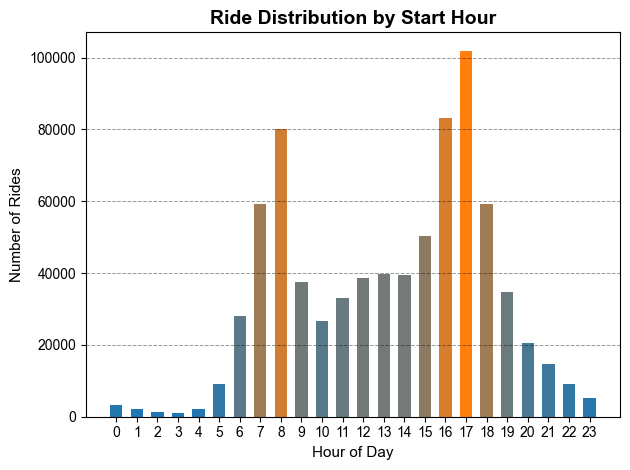

In [50]:
from matplotlib.colors import LinearSegmentedColormap
#Count of Rides per hour
hours = np.arange(24)
start_rides = trip_counts['trips_start_hour'].values 

normalized = (start_rides - start_rides.min()) / (start_rides.max() - start_rides.min())
colors = ['#1f77b4', '#ff7f0e']
cmap = LinearSegmentedColormap.from_list('blue_orange', colors)
bar_colors = cmap(normalized)

plt.figure()
plt.bar(hours, 
        start_rides, 
        color=bar_colors, 
        width=0.6)

plt.xlabel('Hour of Day', 
           fontname='Arial', 
           fontsize=11)

plt.ylabel('Number of Rides', 
           fontname='Arial', 
           fontsize=11)

plt.title('Ride Distribution by Start Hour',
          fontname='Arial',
            fontsize=14, 
            fontweight='bold')

plt.xticks(hours, 
           fontname='Arial',
             fontsize=10)
plt.yticks(fontname='Arial', fontsize=10)

plt.grid(axis='y', 
         linestyle='--', 
         color='black', 
         linewidth=0.7, 
         alpha=0.4)
plt.tight_layout()
plt.show()

<span style="font-size:13px; font-weight:bold">1. Peak Usage Hours</span><br>
<span style="font-size:12px">
The busiest start times are at 08:00, 16:00, and 17:00. These hours align with typical commuting schedules for work or school, suggesting that most riders use bikes as a primary mode of transportation during weekdays.
</span>

<span style="font-size:13px; font-weight:bold">2. Midday Consistency</span><br>
<span style="font-size:12px">
Between 11:00 and 14:00, trip volumes remain steady. This pattern indicates non-commuting activities such as leisure, recreation, or casual errands.
</span>

<span style="font-size:13px; font-weight:bold">3. Low Nighttime Activity</span><br>
<span style="font-size:12px">
Bike usage drops significantly between 00:00 and 05:00, which is expected due to reduced city activity and typical sleeping hours.
</span>

In [51]:
#Total ride_length per day_of_week
daily_ride_length_sum = df_all_trip_filtered.groupby('day_of_week')['ride_length'].sum()
daily_ride_length_sum

day_of_week
1    1325520.22
2    1307891.75
3    1553905.61
4    1522103.38
5    1505421.75
6    1400646.28
7    1075530.74
Name: ride_length, dtype: float64

<span style="font-size:13px; font-weight:bold">Total Ride Duration by Day</span><br>
<span style="font-size:12px">
Total ride duration is highest on weekdays, especially from Tuesday to Thursday. This suggests that many users rely on bikes for commuting during workdays. In contrast, weekends show noticeably lower total durations. To support this insight, further analysis by user type (member vs casual) is recommended. This can help identify potential opportunities to encourage casual riders to convert into members.
</span>

In [52]:
#Statistic descriptive of ride_length by member_casual
df_all_trip_filtered.groupby('member_casual')['ride_length'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
Casual,64779.0,28.51,22.47,1.02,12.72,22.33,35.80,119.98
Member,715603.0,10.96,8.52,1.00,5.33,8.50,13.73,119.92


<span style="font-size:13px; font-weight:bold">Ride Duration by User Type</span><br>
<span style="font-size:12px">
<strong>Casual:</strong> Fewer total trips, but with a higher average duration of 28.51 minutes. The longest ride lasted 119.98 minutes, and the shortest was 1.02 minutes.

<span style="font-size:12px">

<strong>Member:</strong> Significantly more trips, with a lower average duration of 10.96 minutes. The longest ride was 119.92 minutes, and the shortest was 1 minute.

<span style="font-size:12px">

<strong>Conclusion:</strong> Casual riders tend to take longer and more varied trips, while members take shorter but more frequent rides. This reflects a more consistent and structured usage pattern among members.
</span>

In [53]:
#Average and Median ride_length by member_casual and day_of_week
summary = df_all_trip_filtered.groupby(['member_casual', 'day_of_week'])['ride_length'].agg(['mean',
                                                                                             'median']).round(2)

transposed = summary.unstack(level=1)
transposed = transposed.loc[:, sorted(transposed.columns, key=lambda x: x[1])]
transposed

,mean,median,mean,median,mean,median,mean,median,mean,median,mean,median,mean,median
day_of_week,1,1,2,2,3,3,4,4,5,5,6,6,7,7
member_casual,,,,,,,,,,,,,,
Casual,32.6,25.90,24.55,19.15,25.23,18.95,29.03,22.49,25.27,19.5,25.23,19.18,29.65,23.40
Member,12.5,9.18,10.71,8.42,10.83,8.52,10.83,8.47,10.71,8.4,10.56,8.23,11.75,8.78


<span style="font-size:13px; font-weight:bold">Average Ride Duration by Day</span><br>
<span style="font-size:12px">
<strong>Casual:</strong> Shows higher average ride durations on weekends 23.40 minutes on Saturday and 25.90 minutes on Sunday.

<span style="font-size:12px">

<strong>Member:</strong> Displays consistent ride durations throughout the week, averaging around 8 to 9 minutes per day.

<span style="font-size:12px">

<strong>Conclusion:</strong> Casual riders are more active on weekends, likely for recreational or leisure purposes. Members tend to use bikes more regularly and consistently, possibly for commuting or daily routines.
</span>

In [54]:
#Average and Median day_of_week by member_casual 
df_all_trip_filtered.groupby('member_casual')['day_of_week'].agg(['mean', 'median']).round(2)

,mean,median
member_casual,,
Casual,3.84,4.0
Member,4.01,4.0


<span style="font-size:13px; font-weight:bold">Average Number of Rides by Day</span><br>
<span style="font-size:12px">
<strong>Casual:</strong> Has a slightly lower average of 3.84 rides with a median of 4, same as casual.

<span style="font-size:12px">

<strong>Member:</strong> Has an average of 4.01 rides and a median of 4.

<span style="font-size:12px">

<strong>Conclusion:</strong> Both casual and member riders most frequently bike on Wednesdays. Casual riders tend to become more active from Tuesday to Wednesday, while members show consistent activity on Wednesday, likely reflecting regular commuting patterns.
</span>

In [55]:
#Proportion of Commute vs Non-Commute Rides by member_casual
def is_commuting(hour):
    return (7 <= hour <= 9) or (17 <= hour <= 19)

df_all_trip_filtered['is_commute_start'] = df_all_trip_filtered['started_at'].dt.hour.apply(is_commuting)

commute_counts_start = df_all_trip_filtered.groupby(['member_casual', 'is_commute_start'])['ride_id'].count().unstack()
commute_props_start = commute_counts_start.div(commute_counts_start.sum(axis=1), axis=0)
commute_props_start.rename(columns={True: 'Commute Hours', False: 'Non-Commute Hours'}, inplace=True)

commute_props_start

is_commute_start,Non-Commute Hours,Commute Hours
member_casual,,
Casual,0.727288,0.272712
Member,0.503736,0.496264


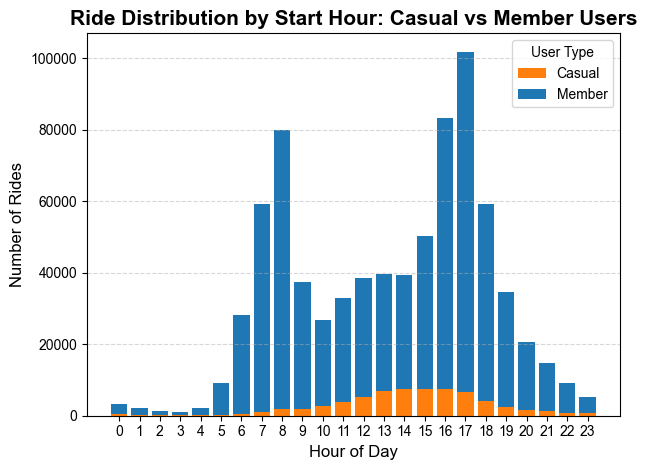

In [56]:
#Ride Distribution by Start Hour and member_casual
df_all_trip_filtered['start_hour'] = df_all_trip_filtered['started_at'].dt.hour
trip_counts_hour = df_all_trip_filtered.groupby(['start_hour', 'member_casual'])['ride_id'].count().unstack(fill_value=0)

hours = np.arange(24)
plt.figure()
plt.rcParams['font.family'] = 'Arial'

plt.bar(hours, 
        trip_counts_hour['Casual'], 
        label='Casual', 
        color='#ff7f0e')
plt.bar(hours,
        trip_counts_hour['Member'], 
        bottom=trip_counts_hour['Casual'], 
        label='Member', 
        color='#1f77b4')

plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.title('Ride Distribution by Start Hour: Casual vs Member Users', 
          fontsize=15, 
          fontweight='bold')

plt.xticks(hours)
plt.legend(title='User Type')

plt.grid(axis='y', 
         linestyle='--', 
         linewidth=0.8, 
         alpha=0.5)

plt.tight_layout()
plt.show()

<span style="font-size:13px; font-weight:bold">Ride Start Time by User Type</span><br>
<span style="font-size:12px">
<strong>Casual:</strong> Most casual riders start their trips during non-commuting hours, with only 27% beginning during commuting times. This supports previous analysis that casual users tend to use bikes for recreation or non-routine activities.

<span style="font-size:12px">

<strong>Member:</strong> Members start rides evenly during commuting and non-commuting hours, indicating consistent daily mobility use.

<span style="font-size:12px">

<strong>Conclusion:</strong> Casual riders primarily use bikes for recreational purposes, while members use them for daily routines.

In [57]:
#Proportion of Weekend vs. Weekday Rides by member_casual
df_all_trip_filtered['is_weekend'] = df_all_trip_filtered['day_of_week'].isin([1, 7])

weekend_counts = df_all_trip_filtered.groupby(['member_casual', 'is_weekend'])['ride_id'].count().unstack()

weekend_props = weekend_counts.div(weekend_counts.sum(axis=1), axis=0)
weekend_props.rename(columns={True: 'Weekend', False: 'Weekday'}, inplace=True)
weekend_props = weekend_props[['Weekday', 'Weekend']]
weekend_props

is_weekend,Weekday,Weekend
member_casual,,
Casual,0.525927,0.474073
Member,0.834362,0.165638


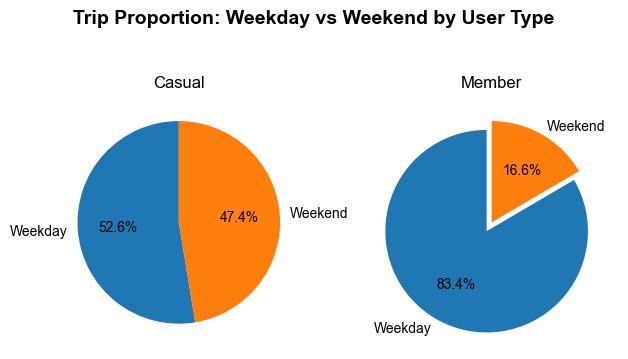

In [58]:
#Proportion: Weekday vs Weekend by member_usual
df_all_trip_filtered['is_weekend'] = df_all_trip_filtered['day_of_week'].isin([1, 7])

weekend_props = df_all_trip_filtered.groupby('member_casual')['is_weekend'].value_counts(normalize=True).unstack()

fig, axes = plt.subplots(1, 2,)

explode_settings = {
    'Member': [0.1, 0],   
    'Casual': [0, 0]     
}

for i, user_type in enumerate(weekend_props.index):
    axes[i].pie(
        weekend_props.loc[user_type],
        autopct='%1.1f%%',
        startangle=90,
        labels=['Weekday', 'Weekend'],
        colors=['#1f77b4','#ff7f0e'],
        explode=explode_settings[user_type]
    )
    axes[i].set_title(f'{user_type.capitalize()}', fontname='Arial', fontsize=12)

fig.suptitle('Trip Proportion: Weekday vs Weekend by User Type', 
             fontname='Arial', 
             fontweight='bold',
             fontsize=14,
             y=0.9
             )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<span style="font-size:13px; font-weight:bold">Bike Usage by Day Type</span><br>
<span style="font-size:12px">
<strong>Casual:</strong> Uses bikes fairly evenly between weekdays (52.6%) and weekends (47.4%).

<span style="font-size:12px">

<strong>Member:</strong> Predominantly uses bikes on weekdays (83.4%) with much less usage on weekends (16.6%).

<span style="font-size:12px">

<strong>Conclusion:</strong> Although casual riders bike nearly equally on weekdays and weekends, almost half ride on weekends, reinforcing that casual users tend to ride for leisure or casual outings. Members predominantly ride on weekdays, reflecting a more functional use of the bike for daily activities.
</span>

In [59]:
#Count of Rides per day_of_week by casual_member
trip_counts_per_day_user = df_all_trip_filtered.groupby(['member_casual', 'day_of_week'])['ride_id'].count().unstack()
trip_counts_per_day_user

day_of_week,1,2,3,4,5,6,7
member_casual,,,,,,,
Casual,17797,5373,6996,7224,6841,7635,12913
Member,59602,109753,127227,121203,124455,114434,58929


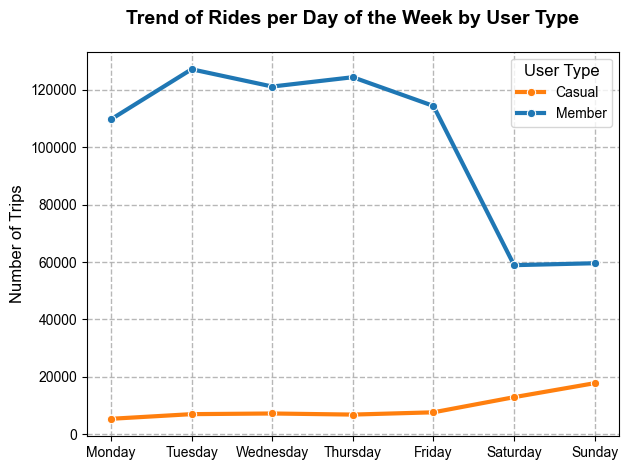

In [60]:
#Count of Riders per day_of_week by member_casual
day_map = {
    1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday',
    5: 'Thursday', 6: 'Friday', 7: 'Saturday'
}

df_all_trip_filtered['day_name'] = df_all_trip_filtered['day_of_week'].map(day_map)

daily_counts = df_all_trip_filtered.groupby(['day_name', 'member_casual'])['ride_id'].count().reset_index(name='trip_count')

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts['day_name'] = pd.Categorical(daily_counts['day_name'], 
                                          categories=ordered_days, 
                                          ordered=True)
daily_counts = daily_counts.sort_values('day_name')

sns.lineplot(data=daily_counts, 
             x='day_name', 
             y='trip_count', 
             hue='member_casual', 
             marker='o', 
             linewidth=3,  
             palette={'Member': '#1f77b4',
                      'Casual': '#ff7f0e' 
             })

plt.title('Trend of Rides per Day of the Week by User Type',
          fontsize=14,
          fontweight='bold',
          fontname='Arial',
          pad=20)  

plt.xlabel('')
plt.ylabel('Number of Trips', fontsize=12, fontname='Arial')
plt.xticks(fontsize=10, fontname='Arial')
plt.yticks(fontsize=10, fontname='Arial')

plt.grid(True, 
         which='both', 
         linestyle='--', 
         linewidth=1, 
         alpha=0.9)  

plt.legend(title='User Type', 
           fontsize=10, 
           title_fontsize=12, 
           loc='upper right')

plt.tight_layout()
plt.show()

<span style="font-size:13px; font-weight:bold">Peak Usage by User Type</span><br>
<span style="font-size:12px">
<strong>Casual:</strong> Peak riding days are Saturday with 12,913 trips and Sunday with 17,797 trips.

<span style="font-size:12px">

<strong>Member:</strong> Consistent riding throughout weekdays, Monday to Friday.

<span style="font-size:12px">

<strong>Conclusion:</strong> This further supports previous analysis showing casual riders prefer weekends while members ride consistently during weekdays.
</span>

In [61]:
#Top 5 Start Stations by member_casual
top_start = (df_all_trip_filtered.groupby(['member_casual', 'start_station_name'])
               .size()
               .reset_index(name='trip_count'))
top_start = top_start.sort_values(['member_casual', 'trip_count'], ascending=[True, False])
top_start = top_start.groupby('member_casual').head(5)
top_start['station_type'] = 'Start Station'
top_start.rename(columns={'start_station_name': 'station_name'}, inplace=True)
top_start

,member_casual,station_name,trip_count,station_type
528,Casual,Streeter Dr & Grand Ave,2659,Start Station
317,Casual,Lake Shore Dr & Monroe St,2654,Start Station
468,Casual,Shedd Aquarium,1809,Start Station
391,Casual,Millennium Park,1341,Start Station
385,Casual,Michigan Ave & Oak St,987,Start Station
687,Member,Canal St & Adams St,13747,Start Station
754,Member,Clinton St & Washington Blvd,13378,Start Station
750,Member,Clinton St & Madison St,12819,Start Station
912,Member,Kingsbury St & Kinzie St,8677,Start Station
756,Member,Columbus Dr & Randolph St,8461,Start Station


<span style="font-size:13px; font-weight:bold">Top Start Stations by User Type</span><br>
<span style="font-size:12px">
<strong>Casual:</strong> The top five start stations for casual users are located near major tourist and recreational spots in Chicago. This supports the idea that casual users bike mainly for leisure, often starting and ending their rides near the same area.

<span style="font-size:12px">

<strong>Member:</strong> The top five start stations for members are located in business and office districts, reinforcing that members primarily use bikes for commuting and daily needs.

<span style="font-size:12px">

<strong>Conclusion:</strong> The top five start stations reveal consistent usage patterns: casual users prefer recreational areas like Streeter Dr & Grand Ave, Millennium Park, and Shedd Aquarium, while members ride for commuting with stations centered around transit hubs and office areas such as Canal St and Clinton St.
</span>

In [62]:
#ride_length Statistics by member_casual and Season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_all_trip_filtered['month'] = df_all_trip_filtered['started_at'].dt.month
df_all_trip_filtered['season'] = df_all_trip_filtered['month'].apply(get_season)

summary = df_all_trip_filtered.groupby(['member_casual', 'season'])['ride_length'].agg(['mean',
                                                                                        'median', 
                                                                                        'std', 
                                                                                        'count']).round(2)
summary

mean  median    std   count
member_casual season                              
Casual        Spring  30.76   24.50  23.07   38799
              Winter  25.15   18.97  21.10   25980
Member        Spring  11.66    8.95   9.14  263776
              Winter  10.56    8.25   8.10  451827

<span style="font-size:13px; font-weight:bold">Ride Duration by Season and User Type</span><br>
<span style="font-size:12px">
<strong>Casual:</strong> Average ride duration is 30.76 minutes in Spring and 25.15 minutes in Winter, with ride variability of 23.07 minutes in Spring and 21.10 minutes in Winter.

<span style="font-size:12px">

<strong>Member:</strong> Average ride duration is 11.66 minutes in Spring and 10.56 minutes in Winter, with ride variability of 9.14 minutes in Spring and 8.10 minutes in Winter.

<span style="font-size:12px">

<strong>Conclusion:</strong> Casual users tend to take longer and more varied rides, peaking in Spring. Members ride more frequently but with shorter, consistent trips, indicating commuting usage. High variability in casual ride duration suggests diverse purposes (recreation, entertainment, exercise), whereas members show routine patterns. Although members have shorter rides, their total trip volume is much higher.
</span>

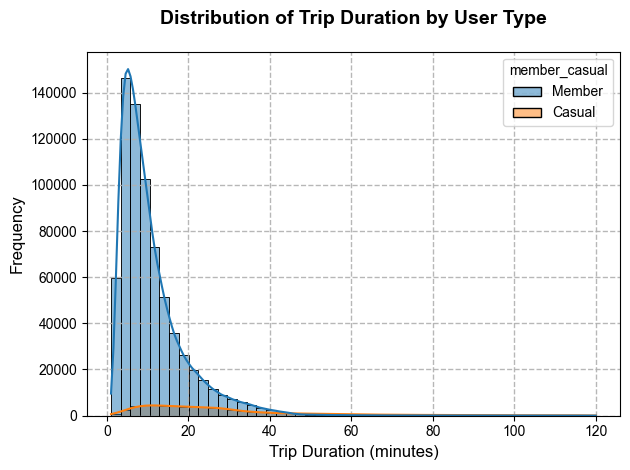

In [63]:
#Distribution of ride_length by member_casual
sns.histplot(
    data=df_all_trip_filtered,
    x='ride_length',
    hue='member_casual',
    bins=50,
    kde=True,
    palette={'Member': '#1f77b4', 'Casual': '#ff7f0e'}
)

plt.title('Distribution of Trip Duration by User Type',
          fontsize=14,
          fontweight='bold',
          fontname='Arial',
          pad=20)

plt.xlabel('Trip Duration (minutes)', 
           fontsize=12, 
           fontname='Arial')
plt.ylabel('Frequency', 
           fontsize=12,
             fontname='Arial')

plt.xticks(fontsize=10, fontname='Arial')
plt.yticks(fontsize=10, fontname='Arial')

plt.grid(True, 
         which='both', 
         linestyle='--', 
         linewidth=1, 
         alpha=0.9)

plt.tight_layout()
plt.show()

<span style="font-size:13px; font-weight:bold">Ride Duration Patterns by User Type</span><br>
<span style="font-size:12px">
<strong>1. Dominance of Short Durations:</strong> Most trips last between 0–20 minutes, indicated by a high peak (mode) in this range. Short durations are common for quick commutes or short-distance travel.<br><br>
<strong>2. Differences Between Members and Casuals:</strong><br>
<strong>Member:</strong> Much higher frequency across almost all durations, especially short trips. This suggests members use the service routinely, often for daily commutes such as going to work or public transit.<br>
<strong>Casual:</strong> Fewer total trips but a slightly longer tail in the duration distribution. This indicates more relaxed or recreational usage rather than regular commuting.<br><br>
<strong>3. Exponentially Decreasing Distribution:</strong> The longer the ride, the fewer the trips for both members and casuals, which is expected as long rides can be tiring or inefficient compared to other transport modes.<br><br>
<strong>Conclusion:</strong> Members tend to ride more frequently and efficiently, dominating short-duration trips which indicate commuting or routine usage. Casual riders use bikes less often and tend to take longer rides, reflecting recreational or exploratory use.
</span>

<div style="font-size:12px; line-height:1.4; font-family:Arial, sans-serif;">

<span style="font-size:13px; font-weight:bold">5. Final Conclusion</span><br><br>

The goal of this analysis was to explore behavioral differences between casual and member riders. Insights from this analysis are intended to help Cyclistic develop marketing strategies that convert casual riders into annual members. The dataset used comes from the first quarter of 2019 and 2020.<br><br>

<span style="font-weight:bold">5.1 Differences Between Members & Casuals</span><br><br>

<table style="font-size:12px; border-collapse:collapse;">
<tr>
<td style="vertical-align:top; padding-right:10px;"><strong>Frequency</strong></td>
<td style="vertical-align:top;">
Members take more frequent trips with an average duration of 10.96 minutes.<br>
Casual riders take fewer trips but with longer, more relaxed rides (avg. 28.51 minutes).
</td>
</tr>
<tr>
<td style="vertical-align:top; padding-right:10px;"><strong>Duration</strong></td>
<td style="vertical-align:top;">
Member rides are more consistent (median 8.5 minutes), ranging from 1 to 119.92 minutes.<br>
Casual rides range from 1.02 to 119.98 minutes.
</td>
</tr>
<tr>
<td style="vertical-align:top; padding-right:10px;"><strong>Day of Use</strong></td>
<td style="vertical-align:top;">
83.4% of member rides occur on weekdays, especially Tuesday to Thursday.<br>
Casual rides are more balanced: 52.6% on weekdays, 47.4% on weekends.
</td>
</tr>
<tr>
<td style="vertical-align:top; padding-right:10px;"><strong>Time of Day</strong></td>
<td style="vertical-align:top;">
Members mostly ride during commuting hours (7–9 AM & 4–6 PM).<br>
Casual riders prefer off-peak hours; only 27% ride during commuting times.
</td>
</tr>
<tr>
<td style="vertical-align:top; padding-right:10px;"><strong>Favorite Stations</strong></td>
<td style="vertical-align:top;">
Members favor stations in business and office areas.<br>
Casuals prefer locations near tourist or recreation spots.
</td>
</tr>
<tr>
<td style="vertical-align:top; padding-right:10px;"><strong>Seasonal</strong></td>
<td style="vertical-align:top;">
Members ride consistently throughout Spring and Winter.<br>
Casual riders take longer, more varied trips, peaking in Spring.
</td>
</tr>
</table><br>

<span style="font-weight:bold">5.2 Why Casual Riders Could Become Members</span><br><br>
• Cost efficiency — although casuals ride less often, their average ride duration is longer (28.51 mins). Regular rides could make membership more economical.<br>
• Casuals ride often on weekends, but 52.6% of their rides occur on weekdays, showing weekday potential.<br>
• With 2–3 rides per week, a membership becomes more practical and flexible.<br>
• Membership offers convenience: easier access and no need to track trip costs individually.<br><br>

<span style="font-weight:bold">5.3 How Cyclistic Can Use Digital Media to Convert Casual Riders</span><br><br>
<strong>1. Ad Timing Based on Casual Activity Patterns</strong><br>
• Show targeted ads (Google Ads, Instagram, Facebook) during casuals’ most active periods: Friday afternoon to Sunday, 10:00–15:00 or evenings.<br>
• Send email campaigns on Thursdays or Fridays featuring weekend route ideas and events.<br>
<b>Why:</b> Casual riders are most active during leisure hours — targeting these times increases engagement and conversion.<br><br>

<strong>2. Communicate Benefits Through Visual and Educational Content</strong><br>
• Use social media and email to highlight benefits:<br>
&nbsp;&nbsp;&nbsp;– “Love weekend rides? Unlock unlimited access with a Cyclistic membership!”<br>
&nbsp;&nbsp;&nbsp;– “Save more. Ride more. Become a member today!”<br>
• Share comparison charts and testimonials from converted casuals.<br>
<b>Why:</b> Many casuals are unaware of financial and practical benefits. Education builds trust and encourages decision-making.<br><br>

<strong>3. Geo-Target Ads Based on Top Casual Start Stations</strong><br>
• Target users in areas near popular casual stations like Streeter Dr & Grand Ave, Millennium Park, etc.<br>
<b>Why:</b> Ads shown near frequent casual routes are more relevant and increase the likelihood of clicks and conversions.

</div>

In [64]:
#df_all_trip_filtered.to_csv(r"C:\Users\HP\Documents\df_all_trip_filtered.csv", index=False)

<div style="font-size:12px; font-family:Arial, sans-serif; line-height:1.4;">
<span style="font-size:13px; font-weight:bold">Interactive Dashboard</span><br>
You can explore the full interactive dashboard for this analysis at the link below:<br><br>
<a href="https://public.tableau.com/app/profile/farhah.farhah/viz/Cyclistic_17514774328940/Dashboard1" target="_blank" style="color:#1a73e8; text-decoration:none;">
🔗 Cyclistic Tableau Dashboard
</a>
</div>